In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df['label'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: label, dtype: int64

In [ ]:
df.shape

(149, 5)

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
label            object
dtype: object

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(149, 4)
(149,)


In [ ]:
x.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2


In [ ]:
y.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: label, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(111, 4)
(38, 4)
(111,)
(38,)


In [ ]:
df['color'] = df['label'].replace({'Iris-setosa':'red','Iris-versicolor':'blue',
                                  'Iris-virginica':'green'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,color
0,4.9,3.0,1.4,0.2,Iris-setosa,red
1,4.7,3.2,1.3,0.2,Iris-setosa,red
2,4.6,3.1,1.5,0.2,Iris-setosa,red
3,5.0,3.6,1.4,0.2,Iris-setosa,red
4,5.4,3.9,1.7,0.4,Iris-setosa,red


In [ ]:
df['color'].value_counts()

green    50
blue     50
red      49
Name: color, dtype: int64

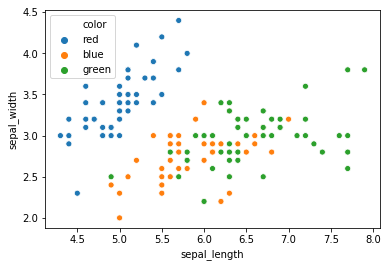

In [ ]:
import seaborn as sns
sns.scatterplot(df['sepal_length'],df['sepal_width'],hue=df['color'])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Criterion='gini'

In [ ]:
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print('Training Accuracy',dt1.score(x_train,y_train))
print('Testing Accuracy',dt1.score(x_test,y_test))

Training Accuracy 1.0
Testing Accuracy 0.9210526315789473


In [ ]:
y_pred = dt1.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
res = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
res.sample(7)

,y_test,y_pred
130,Iris-virginica,Iris-virginica
47,Iris-setosa,Iris-setosa
27,Iris-setosa,Iris-setosa
73,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
57,Iris-versicolor,Iris-versicolor
49,Iris-versicolor,Iris-versicolor


In [ ]:
cm_df = res.groupby(['y_test','y_pred'])['y_pred'].count()
cm_df

y_test           y_pred         
Iris-setosa      Iris-setosa        13
Iris-versicolor  Iris-versicolor    13
                 Iris-virginica      1
Iris-virginica   Iris-versicolor     2
                 Iris-virginica      9
Name: y_pred, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 13  1]
 [ 0  2  9]]


In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



### Criterion = 'entropy'

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
print('Training Accuracy',dt2.score(x_train,y_train))
print('Testing Accuracy',dt2.score(x_test,y_test))

Training Accuracy 1.0
Testing Accuracy 0.9210526315789473


In [ ]:
y_pred = dt2.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
res1.sample(7)

,y_test,y_pred
134,Iris-virginica,Iris-virginica
128,Iris-virginica,Iris-virginica
20,Iris-setosa,Iris-setosa
145,Iris-virginica,Iris-virginica
118,Iris-virginica,Iris-versicolor
12,Iris-setosa,Iris-setosa
135,Iris-virginica,Iris-virginica


In [ ]:
cm_df = res1.groupby(['y_test','y_pred'])['y_pred'].count()
cm_df

y_test           y_pred         
Iris-setosa      Iris-setosa        13
Iris-versicolor  Iris-versicolor    13
                 Iris-virginica      1
Iris-virginica   Iris-versicolor     2
                 Iris-virginica      9
Name: y_pred, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 13  1]
 [ 0  2  9]]


In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

